## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Read Car_Sales.csv Data

In [2]:
df = pd.read_csv('Car_sales.csv')

### Shape of Data

In [3]:
df.shape

(157, 16)

## Let's Explore the data

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Basic information about the dataset and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Prior to summary statistics, identify missing values or duplicates and drop them.

### Missing values

In [6]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [7]:
df.dropna(subset = ['__year_resale_value','Price_in_thousands','Curb_weight','Fuel_efficiency'], inplace=True)
print(df.shape)
df.isna().mean() * 100

(117, 16)


Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

## Check Duplicates

In [8]:
df.duplicated().sum()

0

### Keep only numeric columns in a dataframe 

hint: (use function select_dtype)

In [9]:
df_num = df.select_dtypes(['float64']) #only numeric columns
print (df_num.shape)
df_num.sample(5)

(117, 12)


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
9,17.527,36.125,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724
67,55.557,13.475,14.46,2.5,120.0,93.4,66.7,152.0,3.045,19.0,17.0,48.672898
59,73.203,17.710,20.55,2.0,146.0,103.2,68.9,177.6,3.219,15.3,24.0,60.087967
52,276.747,16.640,31.93,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,87.635496
68,80.556,13.775,21.62,4.0,190.0,101.4,69.4,167.5,3.194,20.0,20.0,76.584440


### Summary statistics

In [10]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,117.0,59.112316,75.058933,0.110000,16.767000,32.299000,76.029000,540.561000
__year_resale_value,117.0,18.031538,11.605632,5.160000,11.240000,14.010000,19.875000,67.550000
Price_in_thousands,117.0,25.969487,14.149699,9.235000,16.980000,21.665000,29.465000,82.600000
Engine_size,117.0,3.048718,1.055169,1.000000,2.200000,3.000000,3.800000,8.000000
Horsepower,117.0,181.282051,58.591786,55.000000,140.000000,175.000000,210.000000,450.000000
Wheelbase,117.0,107.326496,8.050588,92.600000,102.400000,107.000000,111.600000,138.700000
Width,117.0,71.189744,3.530151,62.600000,68.500000,70.400000,73.600000,79.300000
Length,117.0,187.717949,13.849926,149.400000,177.500000,187.800000,196.500000,224.500000
Curb_weight,117.0,3.324051,0.597177,1.895000,2.911000,3.340000,3.823000,5.115000
Fuel_capacity,117.0,17.812821,3.794609,10.300000,15.300000,17.200000,19.800000,32.000000


## Distribution

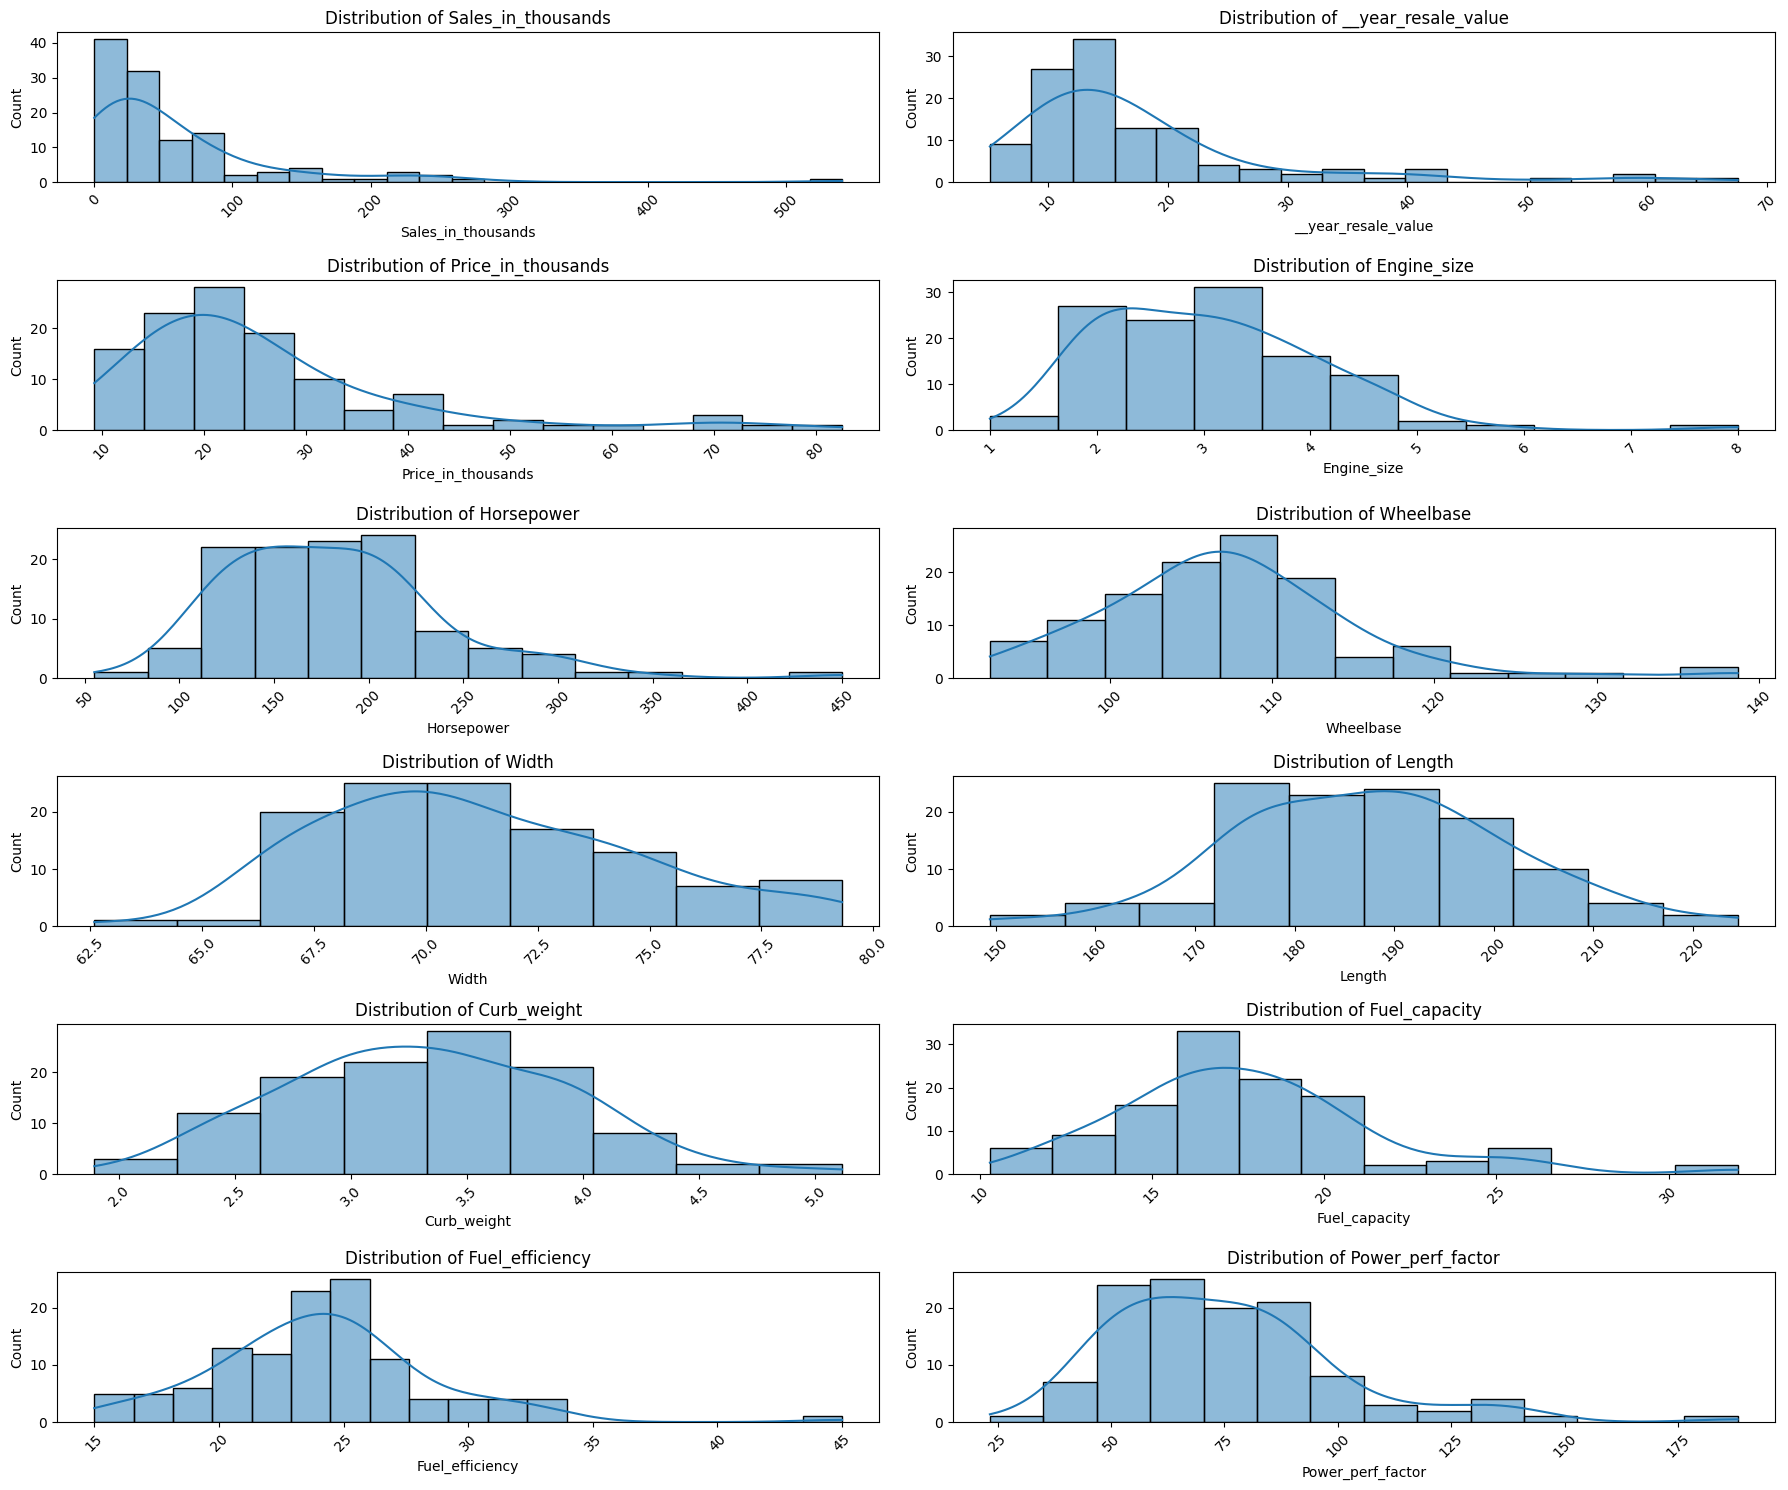

In [11]:
plt.figure(figsize=(18, 15))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(df_num.columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(df_num[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Normalized Distribution (Gaussian)

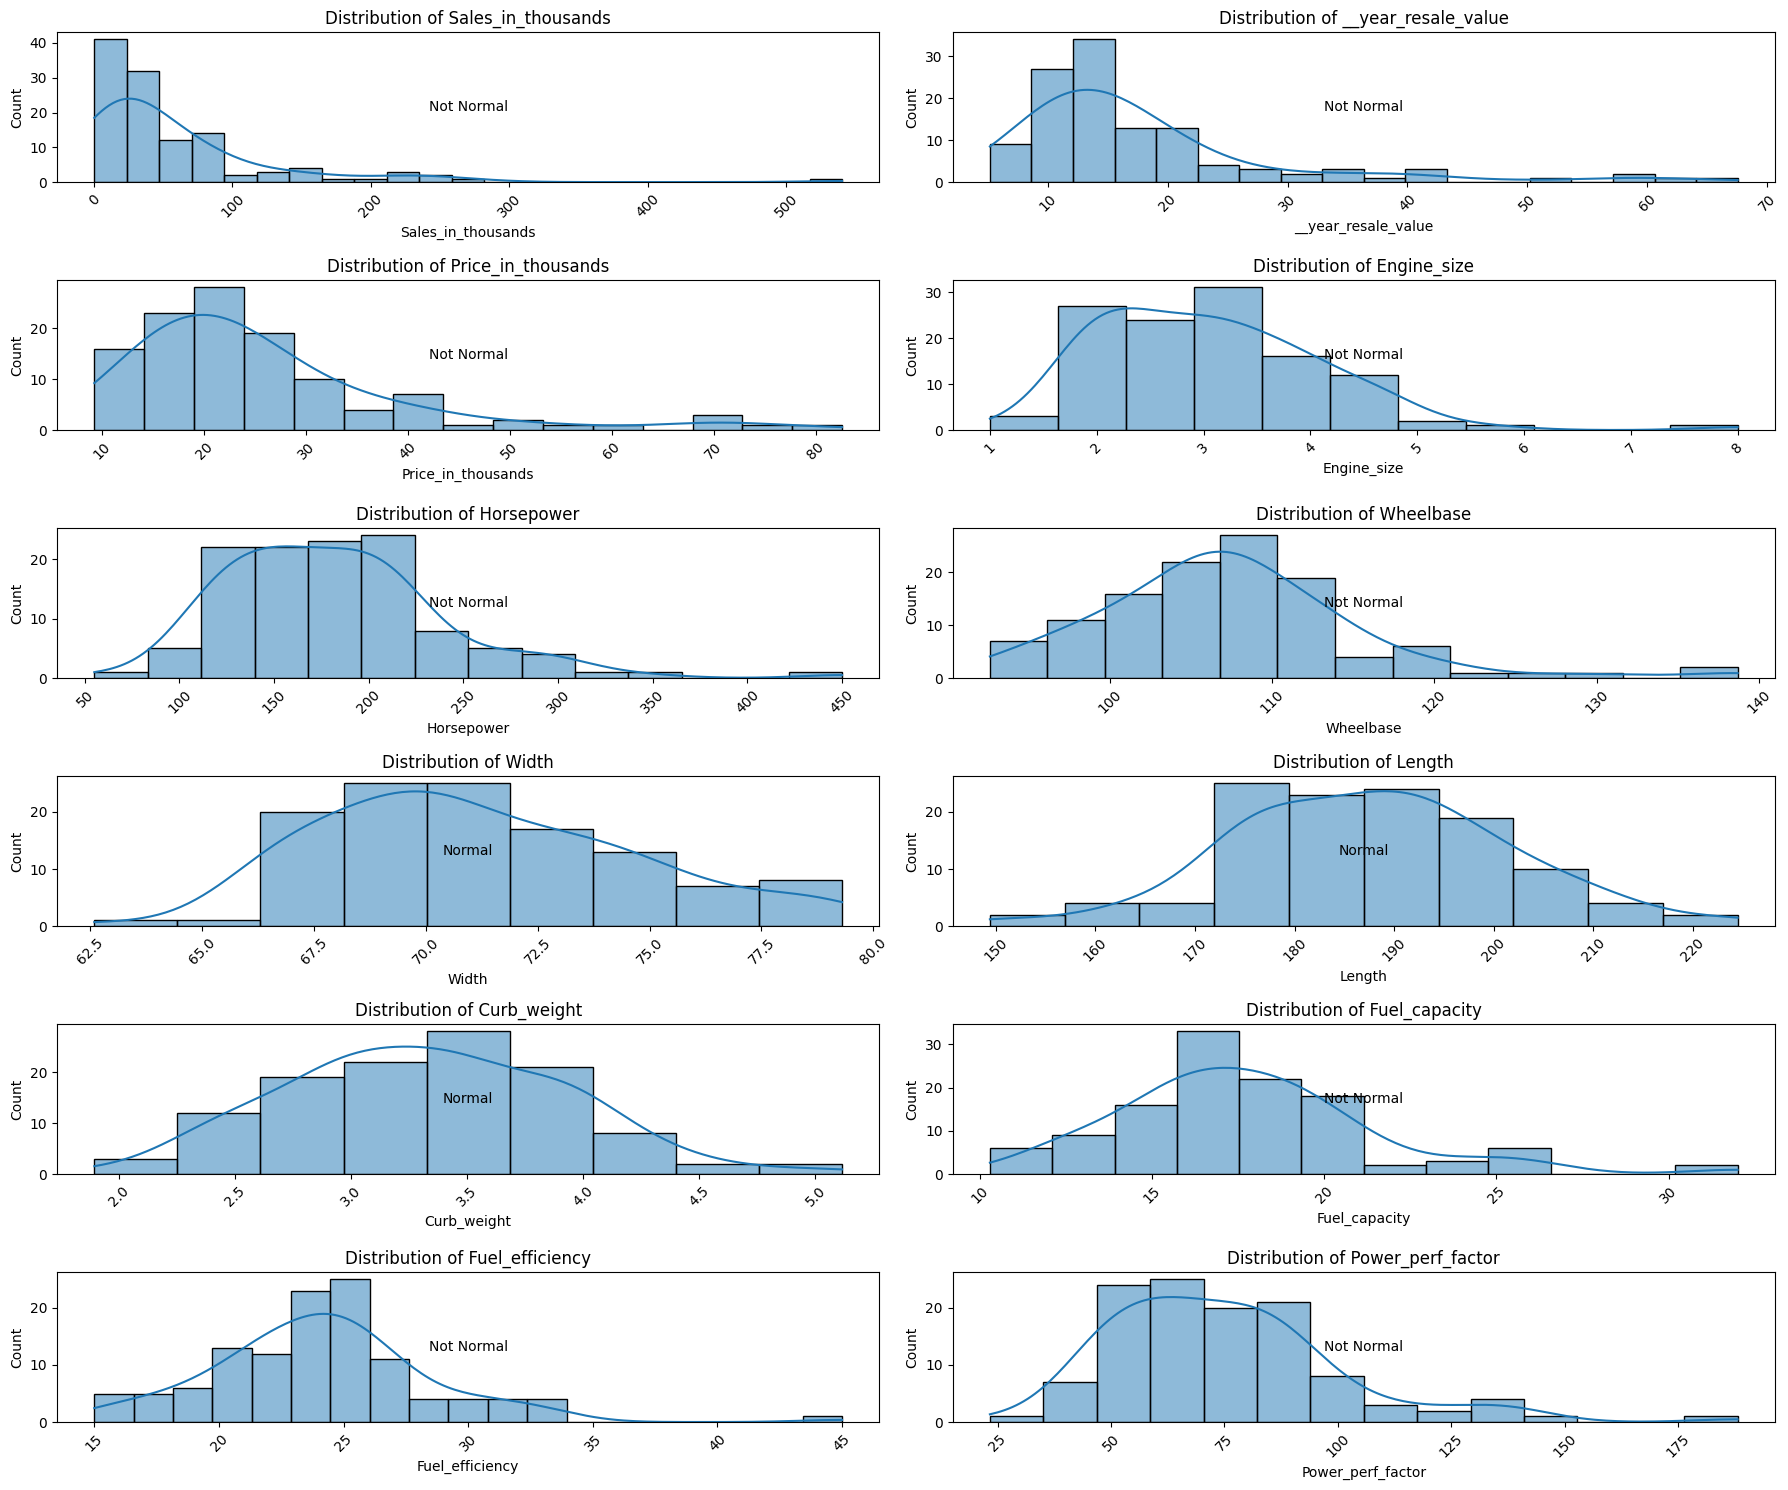

In [12]:
plt.figure(figsize=(18, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_num.columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(df_num[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Detect distribution type
    k2, p = stats.normaltest(df_num[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


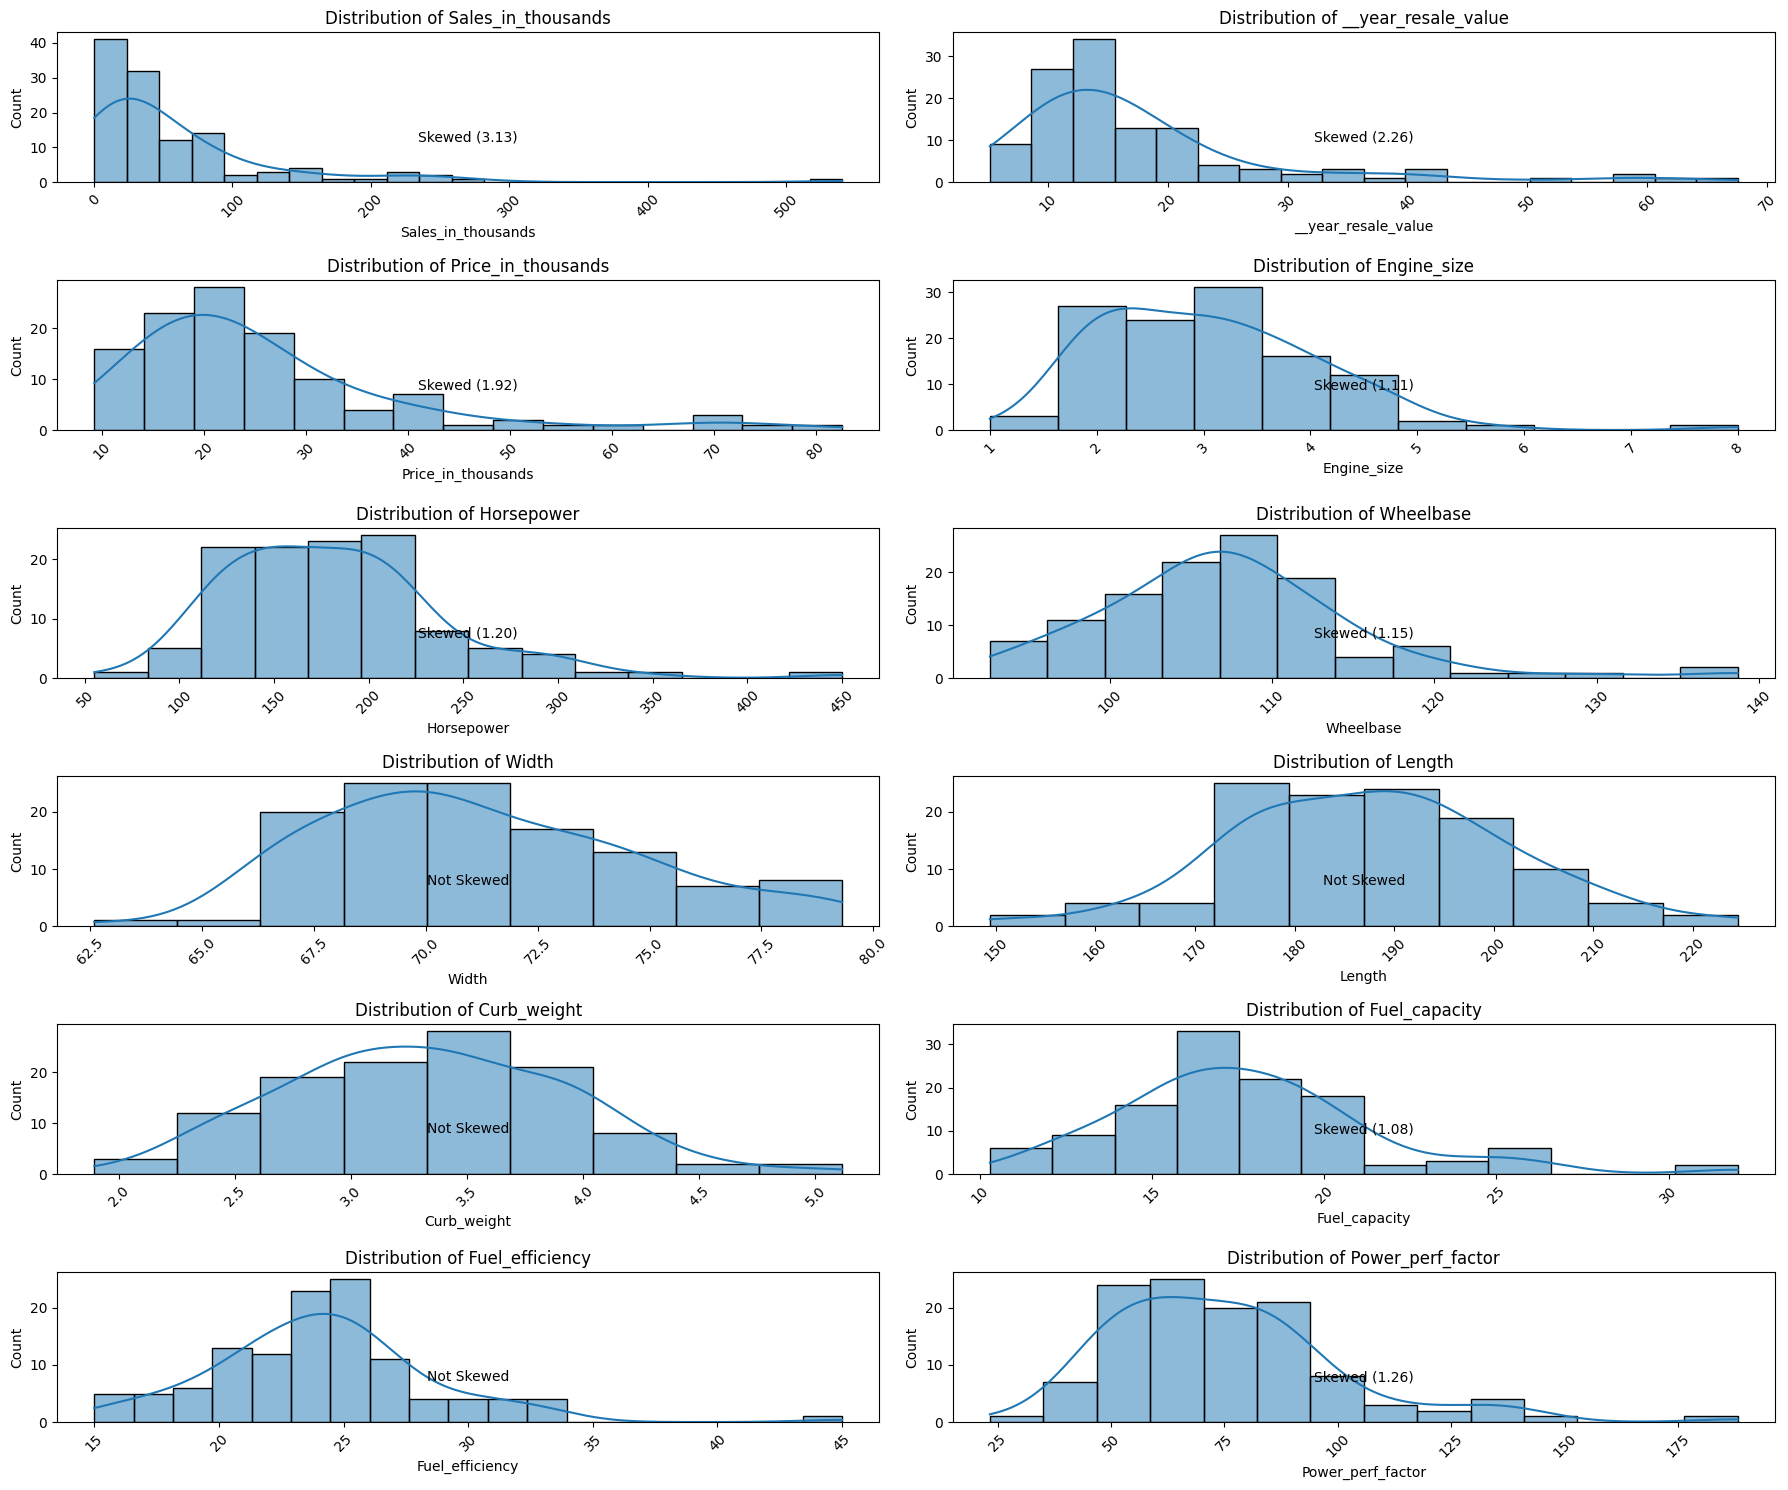

In [13]:
plt.figure(figsize=(18, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_num.columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(df_num[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Check for skewness
    skewness = stats.skew(df_num[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Outliers

Plot Boxplot

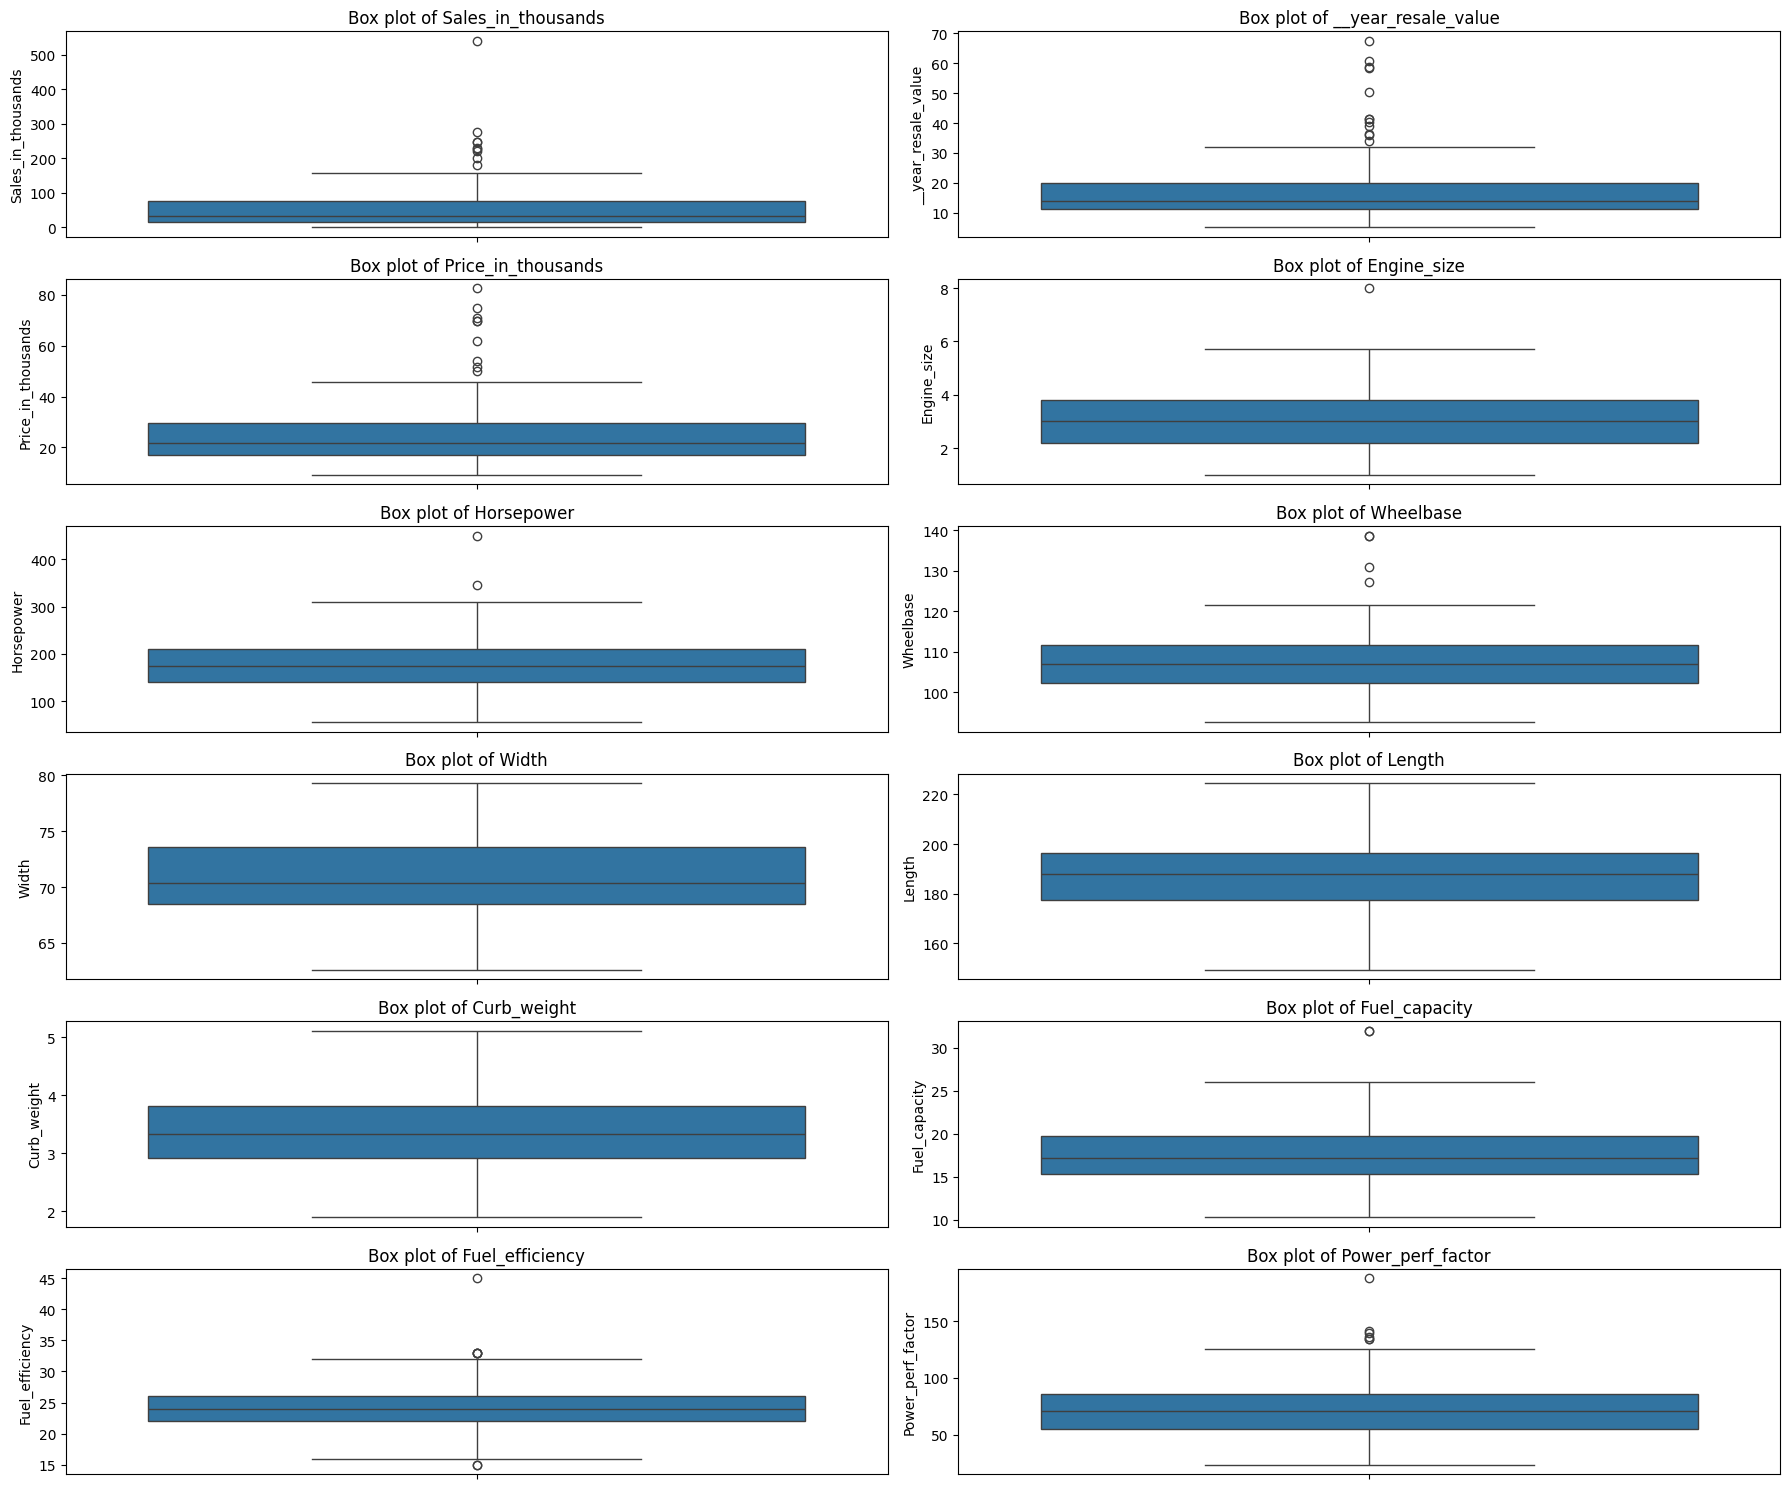

In [14]:
plt.figure(figsize=(18, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_num.columns):
    plt.subplot(6, 2, i+1)
    sns.boxplot(df_num[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Z-score

Detect Outliers using Z-Score. (Set threshold =3)

In [15]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

In [16]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df_num[df_num.columns])

# Print indices of rows containing outliers
outlier_indices = df_num.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Index of rows with outliers: [26, 39, 40, 41, 42, 56, 94, 95, 125, 126]
Count of outliers: 10


## Outliers in each column

In [17]:
df_num.columns

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

In [18]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Sales_in_thousands']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
67,55.557,13.475,14.46,2.5,120.0,93.4,66.7,152.0,3.045,19.0,17.0,48.672898


In [19]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['__year_resale_value']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.loc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
39,0.916,58.470,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,188.144323
95,3.311,58.600,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,139.982294
125,1.280,60.625,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,134.390975
126,1.866,67.550,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,135.914710


In [20]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Price_in_thousands']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.loc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
39,0.916,58.470,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,188.144323
94,16.774,50.375,69.700,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0,125.273876
95,3.311,58.600,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,139.982294
125,1.280,60.625,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,134.390975
126,1.866,67.550,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,135.914710


In [21]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[[ 'Engine_size']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
48,35.068,8.835,17.035,2.5,170.0,106.5,69.1,184.6,2.769,15.0,25.0,67.351011


In [22]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Horsepower']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
48,35.068,8.835,17.035,2.5,170.0,106.5,69.1,184.6,2.769,15.0,25.0,67.351011


In [23]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Wheelbase']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
49,245.815,10.055,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,62.503740
67,55.557,13.475,14.460,2.5,120.0,93.4,66.7,152.0,3.045,19.0,17.0,48.672898


In [24]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Fuel_capacity']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
51,63.403,14.21,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0,80.499537
52,276.747,16.64,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,87.635496


In [25]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Fuel_efficiency']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
31,32.306,12.64,16.48,2.0,132.0,108.0,71.0,186.0,2.911,16.0,27.0,53.5662


In [26]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(df_num[['Power_perf_factor']])
outlier_indices = df_num.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
df_num.iloc[outlier_indices]

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
48,35.068,8.835,17.035,2.5,170.0,106.5,69.1,184.6,2.769,15.0,25.0,67.351011


## Remove outliers

In [27]:
# Remove outliers based on Z-score for a specific column
def remove_outliers_z_score_column(data_column, threshold=3):
    z_scores = zscore(data_column)
    filtered_data = data_column[np.abs(z_scores) <= threshold]
    return filtered_data

In [28]:
updated_data = remove_outliers_z_score_column(df_num)
updated_data['Length'] = df_num['Length']
updated_data['Width'] = df_num['Width']
updated_data['Curb_weight'] = df_num['Curb_weight']
updated_data.shape

(117, 12)

In [29]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(updated_data[updated_data.columns])

# Print indices of rows containing outliers
outlier_indices = updated_data.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))
updated_data.loc[outlier_indices]

Index of rows with outliers: [6, 24, 43, 49, 52, 94, 137]
Count of outliers: 7


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
6,1.380,39.000,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
24,17.947,36.225,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,141.141150
43,111.313,11.260,16.980,2.5,120.0,131.0,71.5,215.0,3.557,22.0,19.0,49.645002
49,245.815,10.055,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,62.503740
52,276.747,16.640,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,87.635496
94,16.774,50.375,NaN,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0,125.273876
137,247.994,13.245,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,54.372420


## Distribution Check

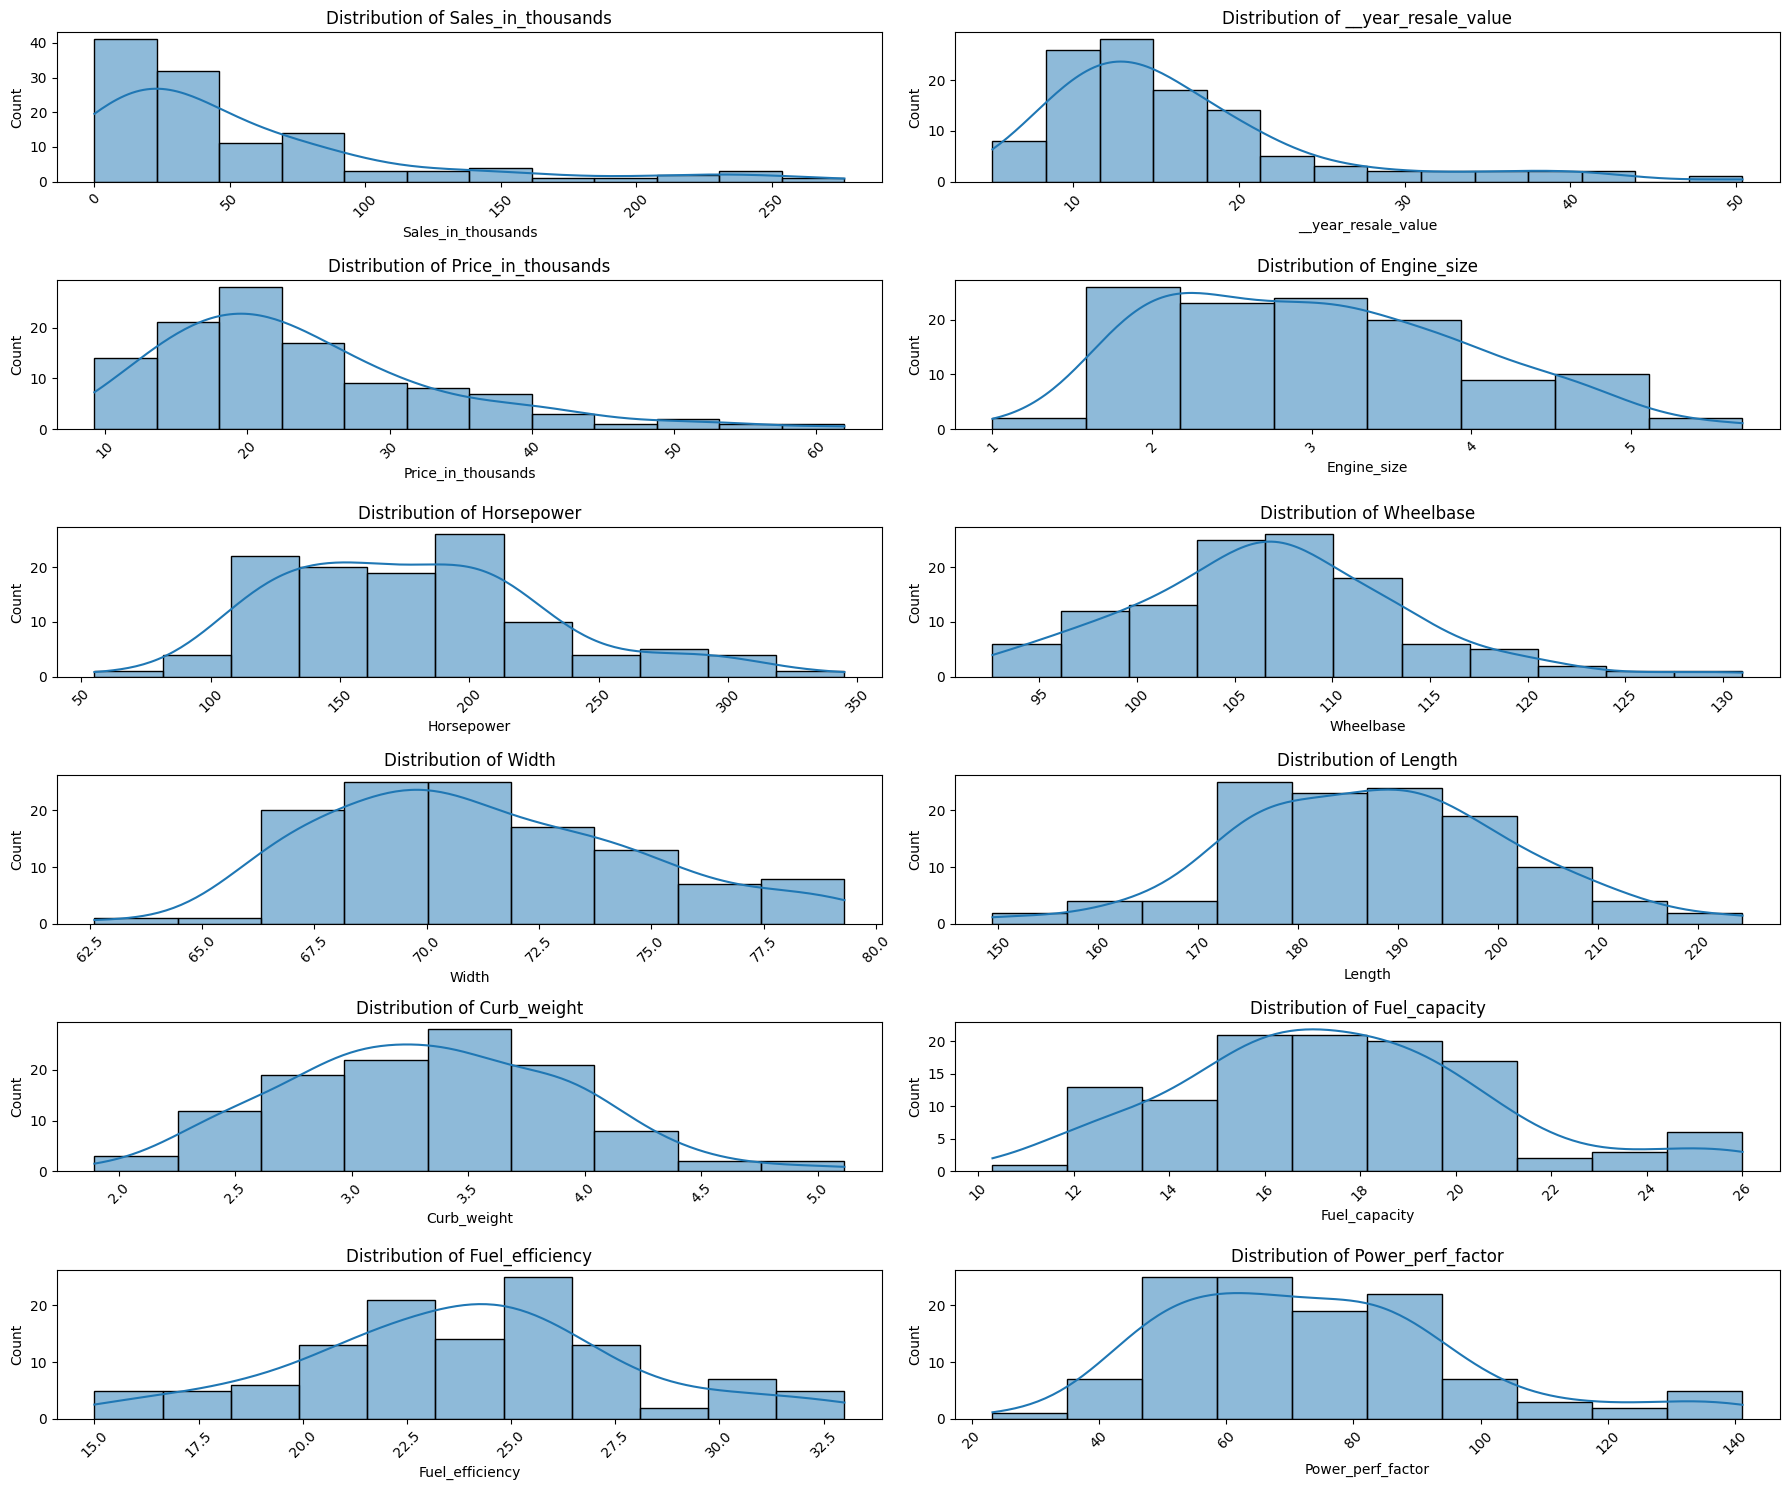

In [30]:
plt.figure(figsize=(18, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Use binning technique to remove Skewness 

In [31]:
num_bins = 59

# Apply binning
updated_data['Sales_in_thousands Binned'] = pd.qcut(updated_data['Sales_in_thousands'], q=num_bins, labels=False)
updated_data['__year_resale_value Binned'] = pd.qcut(updated_data['__year_resale_value'], q=num_bins, labels=False)
updated_data['Price_in_thousands Binned'] = pd.qcut(updated_data['Price_in_thousands'], q=num_bins, labels=False)
updated_data['Power_perf_factor Binned'] = pd.qcut(updated_data['Power_perf_factor'], q=num_bins, labels=False)

# Display the first few rows of the dataset with binned features
updated_data.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands Binned,__year_resale_value Binned,Price_in_thousands Binned,Power_perf_factor Binned
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,15.0,36.0,28.0,15.0
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,34.0,45.0,45.0,48.0
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,7.0,54.0,55.0,48.0
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,20.0,50.0,35.0,23.0
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,17.0,51.0,51.0,42.0


## Distribution check
To confirm if skewness is removed or not

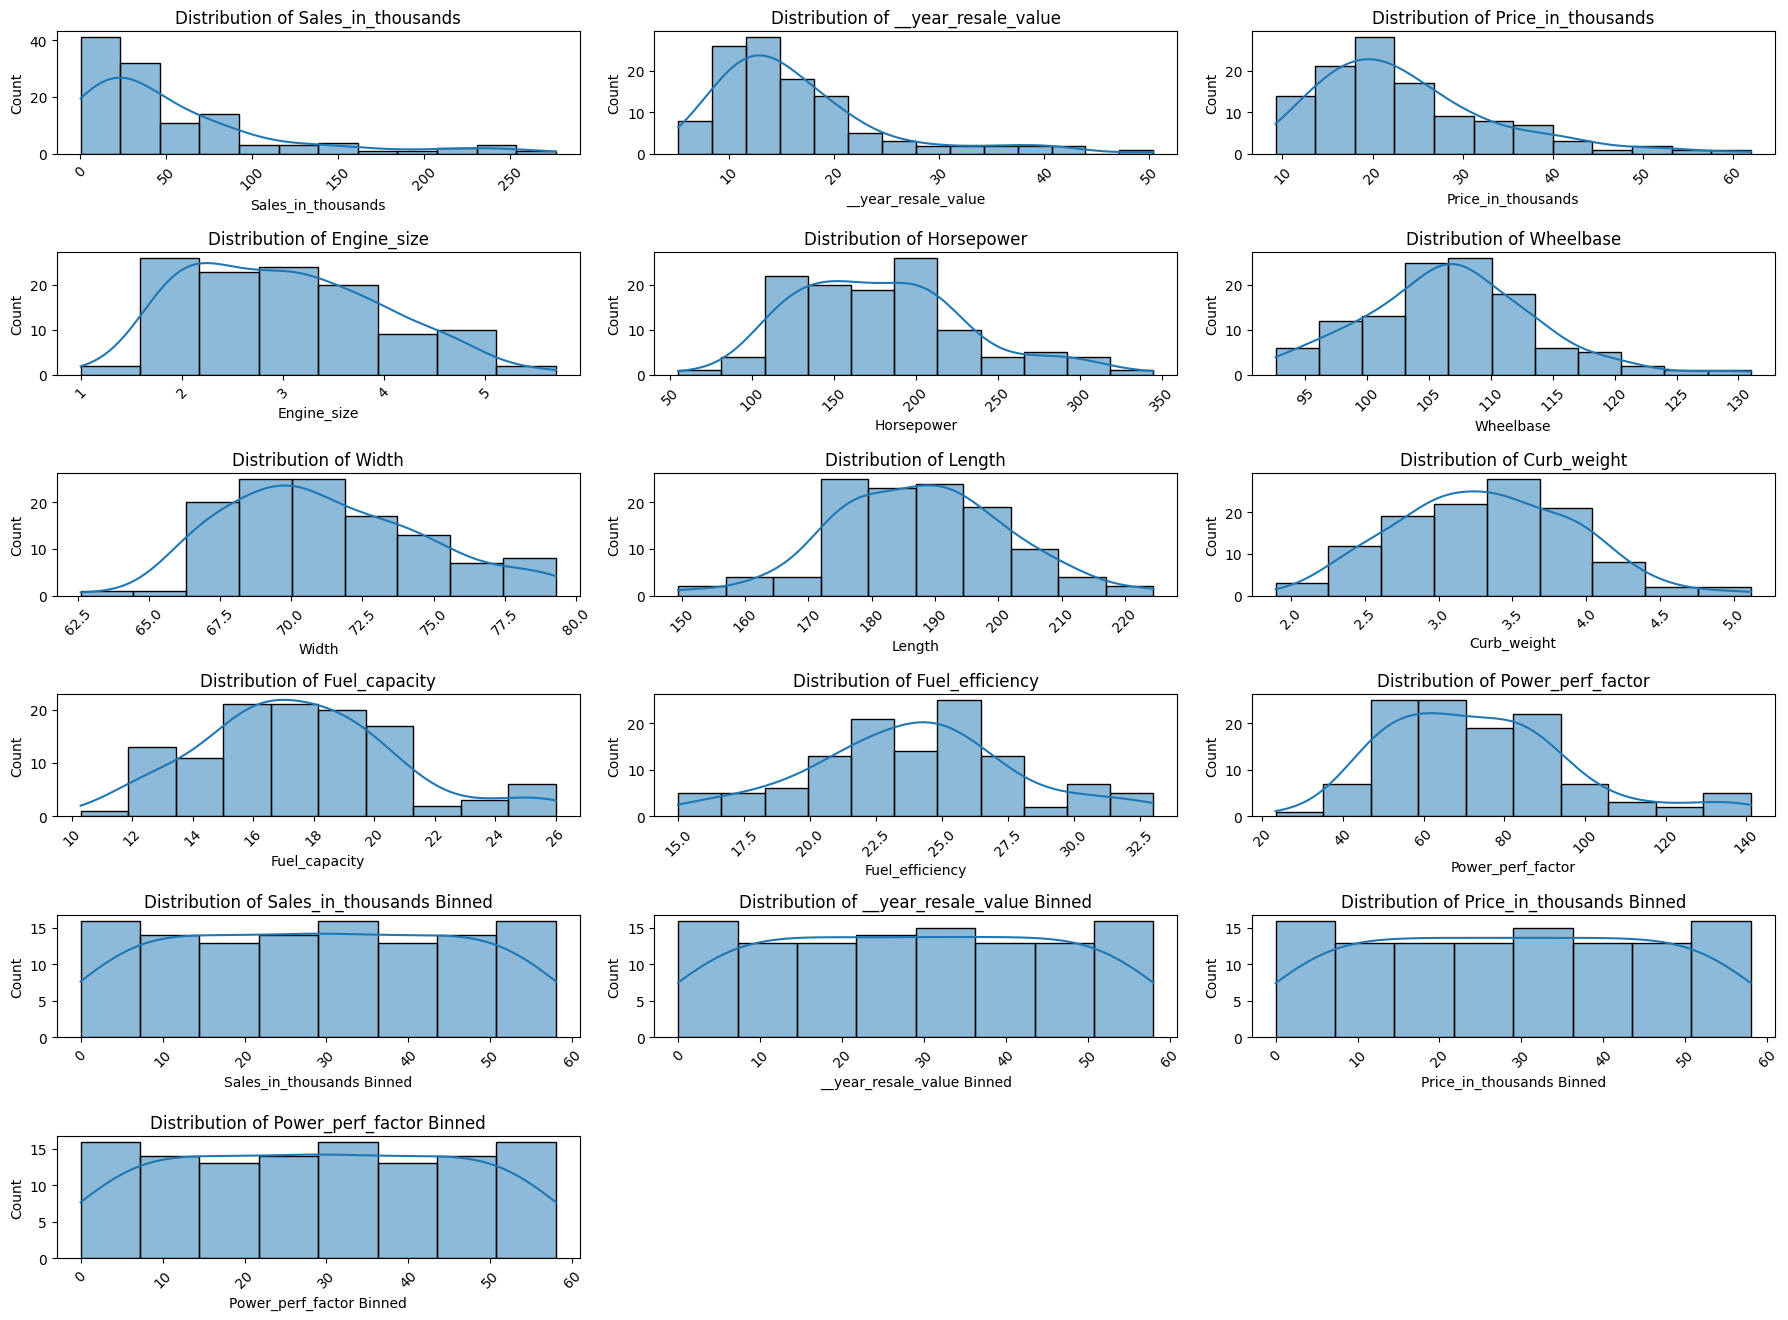

In [32]:
plt.figure(figsize=(18, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [33]:
updated_data.drop(['Sales_in_thousands','__year_resale_value','Price_in_thousands','Power_perf_factor'],axis=1,inplace=True)
updated_data.columns

Index(['Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Sales_in_thousands Binned', '__year_resale_value Binned',
       'Price_in_thousands Binned', 'Power_perf_factor Binned'],
      dtype='object')

In [34]:
updated_data.rename(columns={"Sales_in_thousands Binned": 'Sales_in_thousands', 
                             '__year_resale_value Binned': '__year_resale_value',
                             'Price_in_thousands Binned': 'Price_in_thousands',
                             'Power_perf_factor Binned':'Power_perf_factor'},inplace=True)

### Standardization and Normalization

Apply standardization and normalization on the columns

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaler => Standardization
# MinMax Scaler => Normalization

In [36]:
updated_data.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_in_thousands,__year_resale_value,Price_in_thousands,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,15.0,36.0,28.0,15.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,34.0,45.0,45.0,48.0
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,7.0,54.0,55.0,48.0
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,20.0,50.0,35.0,23.0
5,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,17.0,51.0,51.0,42.0


## Standardization

In [37]:
scaler_std = StandardScaler()
updated_data['Length_standardized'] = scaler_std.fit_transform(updated_data[['Length']])

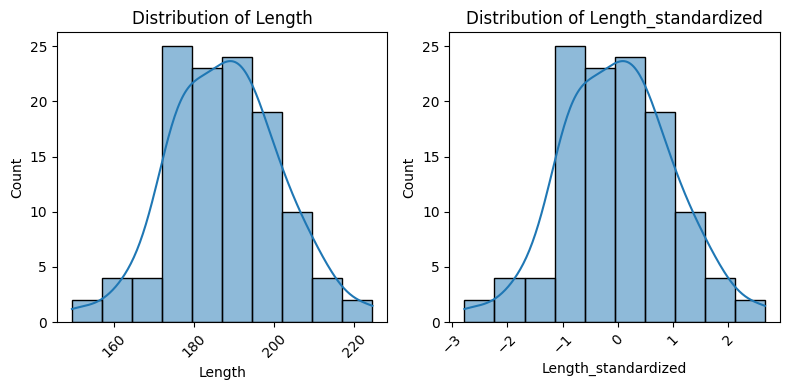

In [38]:
numerical_columns = ['Length','Length_standardized']

plt.figure(figsize=(8, 4))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [39]:
# drop the previous column
'Length','Length_standardized'
updated_data.drop(['Length'],axis=1,inplace=True)
#rename the column for readability
updated_data.rename(columns={'Length_standardized':'Length'},inplace=True)

In [40]:
ToStandardize_columns = ['Curb_weight', 'Width']

In [41]:
for col in ToStandardize_columns:
    updated_data[col] = scaler_std.fit_transform(updated_data[[col]])

## Normalization

In [42]:
Normalization = MinMaxScaler()

In [43]:
updated_data["Engine_size_Normalized"] = Normalization.fit_transform(updated_data[["Engine_size"]])

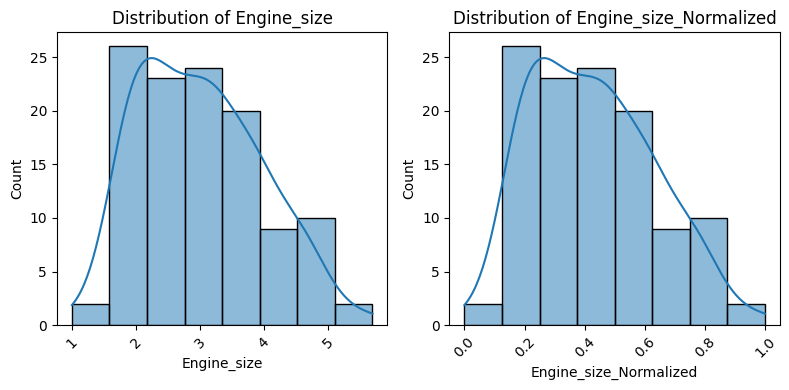

In [44]:
import seaborn as sns
from scipy import stats
numerical_columns = ["Engine_size","Engine_size_Normalized"]

plt.figure(figsize=(8, 4))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [45]:
# drop the previous column
"Engine_size","Engine_size_Normalized"
updated_data.drop(['Engine_size'],axis=1,inplace=True)
#rename the column for readability
updated_data.rename(columns={'Engine_size_Normalized':'Engine_size'},inplace=True)

In [46]:
ToNormalize_columns = ['Horsepower', 'Wheelbase', 'Fuel_capacity','Fuel_efficiency', 
                       'Sales_in_thousands', '__year_resale_value','Price_in_thousands', 'Power_perf_factor']

for col in ToNormalize_columns:
    updated_data[col] = Normalization.fit_transform(updated_data[[col]])

## Distribution check

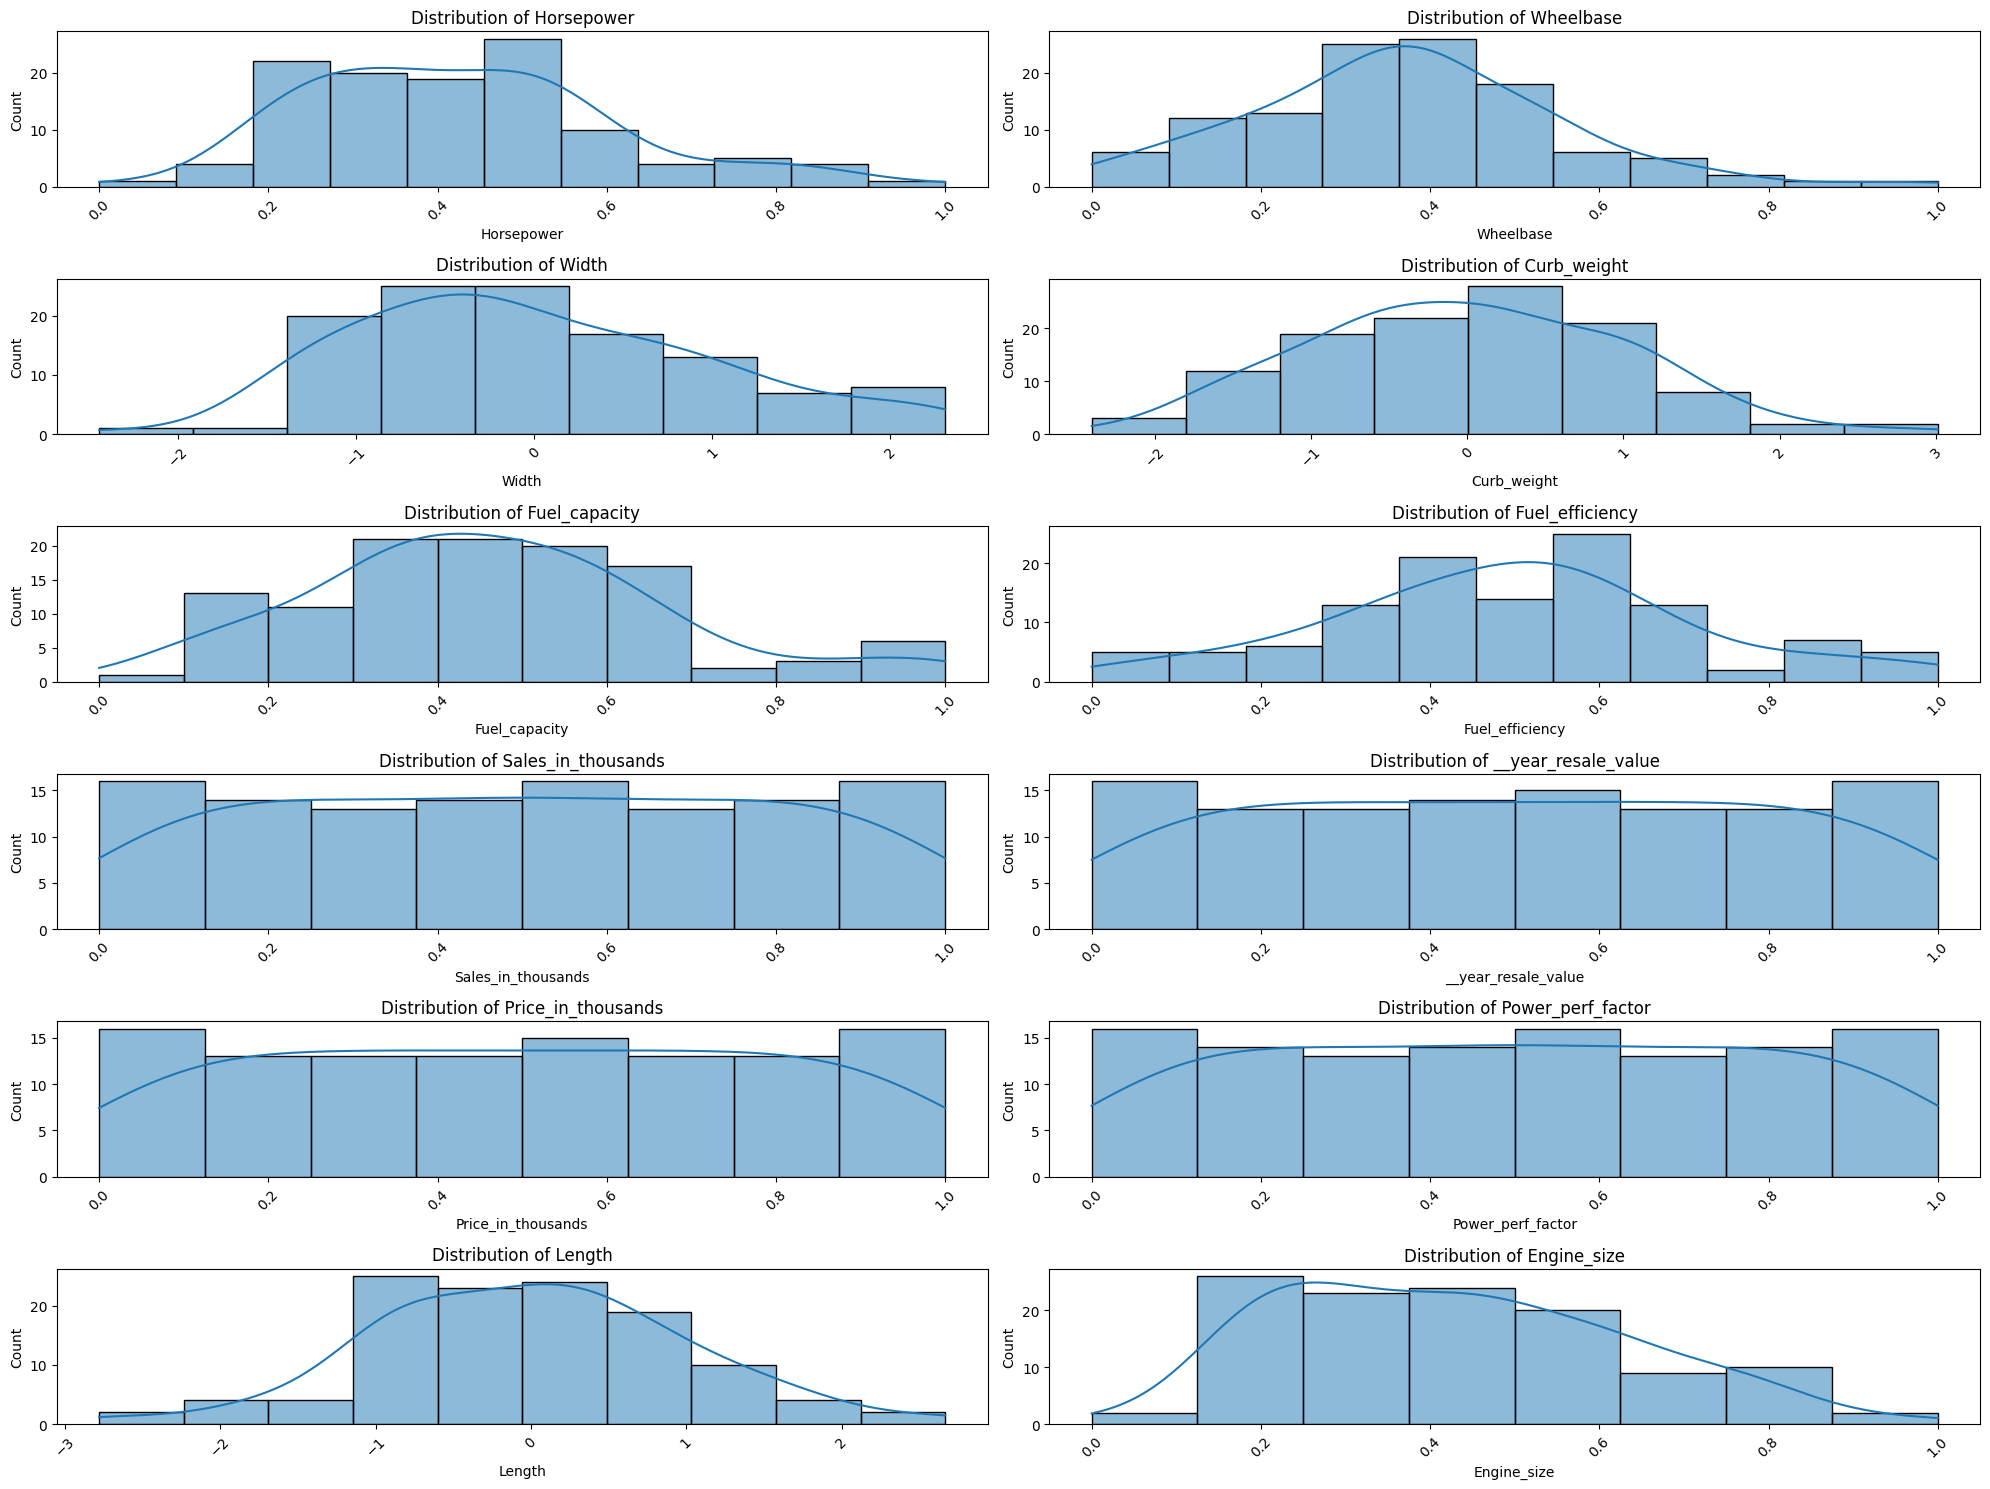

In [47]:
plt.figure(figsize=(20, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## The END!